<a href="https://colab.research.google.com/github/riamsnow/FutureMakers/blob/main/sarcasmdetector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/content/drive/My Drive/FutureMakers'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/content/drive/My Drive/FutureMakers/archive.zip
/content/drive/My Drive/FutureMakers/sarcasmdetector.ipynb
/content/drive/My Drive/FutureMakers/Sarcasm_Headlines_Dataset.json
/content/drive/My Drive/FutureMakers/Sarcasm_Headlines_Dataset_v2.json


In [10]:
import pandas as pd

datastore = pd.read_json('/content/drive/My Drive/FutureMakers/Sarcasm_Headlines_Dataset_v2.json', lines = True)

sentences = datastore['headline'].tolist()
labels = datastore['is_sarcastic'].tolist()
urls = datastore['article_link'].tolist()

#shuffle data to split into train, test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(sentences, labels, train_size = 0.8, random_state = 42, shuffle = True)

In [11]:
datastore.shape
train_dataframe = datastore[0:22895]
test_dataframe = datastore[22895:28619]

In [12]:
print(len(X_train))
print(len(y_train))
print(len(X_test))
print(len(y_test))

22895
22895
5724
5724


In [13]:
#tokenize text
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

vocab_size = 10000
embedding_dim = 16
max_length = 100
training_size = 20000

tokenizer = Tokenizer(num_words=vocab_size, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train)
word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(X_train)
training_padded = pad_sequences(training_sequences,maxlen=max_length, padding='post', truncating='post')

testing_sequences = tokenizer.texts_to_sequences(X_test)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding='post', truncating='post')

In [14]:
import numpy as np

training_padded = np.array(training_padded)
training_labels = np.array(y_train)
testing_padded = np.array(testing_padded)
testing_labels = np.array(y_test)

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length = max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
history = model.fit(training_padded, training_labels, epochs=30, validation_data=(testing_padded, testing_labels), verbose=2)

Epoch 1/30
716/716 - 5s - loss: 0.6295 - accuracy: 0.6442 - val_loss: 0.4691 - val_accuracy: 0.8078
Epoch 2/30
716/716 - 3s - loss: 0.3738 - accuracy: 0.8482 - val_loss: 0.3650 - val_accuracy: 0.8384
Epoch 3/30
716/716 - 3s - loss: 0.2900 - accuracy: 0.8832 - val_loss: 0.3468 - val_accuracy: 0.8470
Epoch 4/30
716/716 - 3s - loss: 0.2485 - accuracy: 0.9004 - val_loss: 0.3317 - val_accuracy: 0.8531
Epoch 5/30
716/716 - 3s - loss: 0.2156 - accuracy: 0.9162 - val_loss: 0.3370 - val_accuracy: 0.8519
Epoch 6/30
716/716 - 3s - loss: 0.1932 - accuracy: 0.9252 - val_loss: 0.3460 - val_accuracy: 0.8526
Epoch 7/30
716/716 - 3s - loss: 0.1727 - accuracy: 0.9360 - val_loss: 0.3556 - val_accuracy: 0.8555
Epoch 8/30
716/716 - 3s - loss: 0.1563 - accuracy: 0.9417 - val_loss: 0.3719 - val_accuracy: 0.8531
Epoch 9/30
716/716 - 3s - loss: 0.1429 - accuracy: 0.9479 - val_loss: 0.4021 - val_accuracy: 0.8429
Epoch 10/30
716/716 - 3s - loss: 0.1327 - accuracy: 0.9511 - val_loss: 0.4174 - val_accuracy: 0.8442

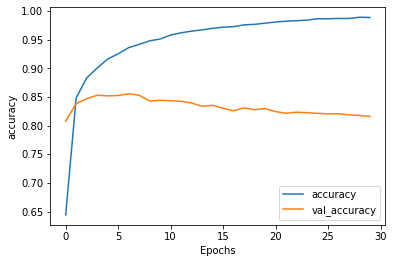

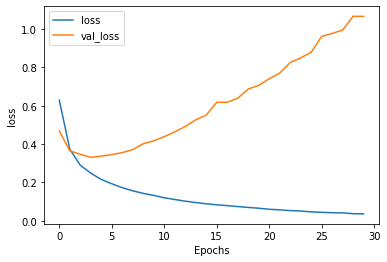

In [15]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [16]:
#CNN Model
model1 = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length = max_length),
    tf.keras.layers.Conv1D(128, 5, activation='relu'),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model1.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
history1 = model1.fit(training_padded, training_labels, epochs=30, validation_data=(testing_padded, testing_labels), verbose=2)

Epoch 1/30
716/716 - 18s - loss: 0.4955 - accuracy: 0.7383 - val_loss: 0.3892 - val_accuracy: 0.8225
Epoch 2/30
716/716 - 3s - loss: 0.2796 - accuracy: 0.8863 - val_loss: 0.3497 - val_accuracy: 0.8414
Epoch 3/30
716/716 - 3s - loss: 0.2074 - accuracy: 0.9193 - val_loss: 0.3703 - val_accuracy: 0.8456
Epoch 4/30
716/716 - 3s - loss: 0.1627 - accuracy: 0.9397 - val_loss: 0.3924 - val_accuracy: 0.8513
Epoch 5/30
716/716 - 3s - loss: 0.1295 - accuracy: 0.9538 - val_loss: 0.4372 - val_accuracy: 0.8443
Epoch 6/30
716/716 - 3s - loss: 0.0976 - accuracy: 0.9679 - val_loss: 0.4991 - val_accuracy: 0.8435
Epoch 7/30
716/716 - 3s - loss: 0.0705 - accuracy: 0.9782 - val_loss: 0.5370 - val_accuracy: 0.8412
Epoch 8/30
716/716 - 3s - loss: 0.0484 - accuracy: 0.9856 - val_loss: 0.6308 - val_accuracy: 0.8360
Epoch 9/30
716/716 - 3s - loss: 0.0318 - accuracy: 0.9914 - val_loss: 0.7246 - val_accuracy: 0.8297
Epoch 10/30
716/716 - 3s - loss: 0.0203 - accuracy: 0.9947 - val_loss: 0.8383 - val_accuracy: 0.830

In [17]:
#LSTM model
model2 = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length = max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model2.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
history2 = model2.fit(training_padded, training_labels, epochs=30, validation_data=(testing_padded, testing_labels), verbose=2)

Epoch 1/30
716/716 - 11s - loss: 0.4002 - accuracy: 0.8087 - val_loss: 0.3278 - val_accuracy: 0.8538
Epoch 2/30
716/716 - 8s - loss: 0.2293 - accuracy: 0.9063 - val_loss: 0.3311 - val_accuracy: 0.8566
Epoch 3/30
716/716 - 8s - loss: 0.1678 - accuracy: 0.9345 - val_loss: 0.3574 - val_accuracy: 0.8553
Epoch 4/30
716/716 - 8s - loss: 0.1230 - accuracy: 0.9530 - val_loss: 0.4127 - val_accuracy: 0.8484
Epoch 5/30
716/716 - 8s - loss: 0.0822 - accuracy: 0.9706 - val_loss: 0.4623 - val_accuracy: 0.8520
Epoch 6/30
716/716 - 8s - loss: 0.0506 - accuracy: 0.9831 - val_loss: 0.6264 - val_accuracy: 0.8499
Epoch 7/30
716/716 - 8s - loss: 0.0333 - accuracy: 0.9888 - val_loss: 0.6765 - val_accuracy: 0.8464
Epoch 8/30
716/716 - 8s - loss: 0.0248 - accuracy: 0.9922 - val_loss: 0.8165 - val_accuracy: 0.8442
Epoch 9/30
716/716 - 8s - loss: 0.0173 - accuracy: 0.9944 - val_loss: 0.9317 - val_accuracy: 0.8428
Epoch 10/30
716/716 - 8s - loss: 0.0137 - accuracy: 0.9953 - val_loss: 0.9067 - val_accuracy: 0.840

In [18]:
#RNN Model
# encoder = tf.keras.layers.experimental.preprocessing.TextVectorization(max_tokens=vocab_size)
# encoder.adapt((datastore['headline']).map(lambda text, label: text))
model3 = tf.keras.Sequential([
    #encoder,
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length = max_length, mask_zero=True),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64,  return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1)
])
model3.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True), optimizer=tf.keras.optimizers.Adam(1e-4),metrics=['accuracy'])
history3 = model3.fit(training_padded, training_labels, epochs=10, validation_data=(testing_padded, testing_labels), verbose=2, validation_steps=30)

Epoch 1/10
716/716 - 27s - loss: 0.5586 - accuracy: 0.6505 - val_loss: 0.4137 - val_accuracy: 0.7942
Epoch 2/10
716/716 - 13s - loss: 0.3402 - accuracy: 0.8443 - val_loss: 0.3517 - val_accuracy: 0.8363
Epoch 3/10
716/716 - 13s - loss: 0.2591 - accuracy: 0.8933 - val_loss: 0.3413 - val_accuracy: 0.8491
Epoch 4/10
716/716 - 12s - loss: 0.2097 - accuracy: 0.9184 - val_loss: 0.3588 - val_accuracy: 0.8498
Epoch 5/10
716/716 - 12s - loss: 0.1743 - accuracy: 0.9368 - val_loss: 0.3780 - val_accuracy: 0.8538
Epoch 6/10
716/716 - 12s - loss: 0.1469 - accuracy: 0.9473 - val_loss: 0.4074 - val_accuracy: 0.8531
Epoch 7/10
716/716 - 12s - loss: 0.1220 - accuracy: 0.9585 - val_loss: 0.4823 - val_accuracy: 0.8510
Epoch 8/10
716/716 - 13s - loss: 0.1036 - accuracy: 0.9650 - val_loss: 0.5231 - val_accuracy: 0.8496
Epoch 9/10
716/716 - 12s - loss: 0.0875 - accuracy: 0.9706 - val_loss: 0.6025 - val_accuracy: 0.8445
Epoch 10/10
716/716 - 12s - loss: 0.0749 - accuracy: 0.9764 - val_loss: 0.6593 - val_accura

In [45]:
# BERT
#!pip install bert-tokenizer
#from bert import bert_tokenization
#import tensorflow_datasets as tfds
#from tqdm.notebook import tqdm
#import numpy as np
#import pandas as pd

#bert_tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)
#def input_for_bert_model(df, tokenizer, max_seq_length):
    #columns_list = df.columns.tolist()
    #input_ids = np.zeros((len(df), max_seq_length))
    #input_attention_masks = np.zeros((len(df), max_seq_length))
    
   # if 'is_sarcastic' in columns_list:
    #    train_labels = np.zeros((len(df), 1))
    #    for i, labels in enumerate(df['is_sarcastic']):
    #        train_labels[i,:] = labels
    
    #for i, sequence in enumerate(df['headline']):
     #   tokens = tokenizer.encode_plus(
      #      sequence,
      #      max_length = max_seq_length, # max length of the text that can go to BERT
      #      truncation=True, padding='max_length',
      #      add_special_tokens = True, # add [CLS], [SEP]
       #     return_token_type_ids = False, 
       #     return_attention_mask = True, # add attention mask to not focus on pad tokens
        #    return_tensors = 'tf'
      #  )
      #  input_ids[i,:], input_attention_masks[i,:] = tokens['input_ids'], tokens['attention_mask']
    
  #  if 'is_sarcastic' in columns_list:
    #    return input_ids, input_attention_masks, train_labels
   # else:
     #   return input_ids, input_attention_masks
    
#train_ids, train_attention_masks, train_labels = input_for_bert_model(train_dataframe, bert_tokenizer, max_length)
#test_ids, test_attention_masks, test_labels = input_for_bert_model(test_dataframe, bert_tokenizer, max_length)
#train_inputs = {"input_ids":train_ids[:22895], "attention_mask":train_attention_masks[:22895]}
#train_outputs = train_labels[:22895]
#valid_inputs = {"input_ids":train_ids[22895:], "attention_mask":train_attention_masks[22895:]}
#valid_outputs = train_labels[22895:]
#test_inputs = {"input_ids":test_ids, "attention_mask":test_attention_masks}
#test_outputs = test_labels[22895:]

In [46]:
#Bert model initialization
#from transformers import BertTokenizer, TFBertModel
#bert_model = TFBertModel.from_pretrained('bert-base-uncased')
#input_ids = tf.keras.layers.Input(shape=(max_length,), dtype=tf.int32, name="input_ids")
#attention_mask = tf.keras.layers.Input(shape=(max_length,), dtype=tf.int32, name="attention_mask")
#sequence_output = bert_model(input_ids, attention_mask=attention_mask)[0][:,0,:]
#x = tf.keras.layers.Dropout(0.1)(sequence_output)
#out = tf.keras.layers.Dense(1, activation='linear', name="outputs")(x)
#model4 = tf.keras.Model(inputs=[input_ids, attention_mask], outputs=out)

In [47]:
#optimizer = tf.keras.optimizers.Adam(lr=1e-4)
#model4.compile(optimizer=optimizer, loss='mean_squared_error', metrics=[tf.keras.metrics.RootMeanSquaredError()])
#history4 = model4.fit(train_inputs, train_outputs, epochs=10, batch_size=8, validation_data=(valid_inputs, valid_outputs))

In [48]:
#plotting comparison between 3 models
import pandas as pd
from pandas import DataFrame
accuracy = [max(history1.history['val_accuracy']),max(history2.history['val_accuracy']), max(history3.history['val_accuracy'])]
loss = [max(history1.history['val_loss']),max(history2.history['val_loss']),max(history3.history['val_loss'])]

col={'Accuracy':accuracy,'Loss':loss}
models=['NN','CNN','LSTM']
graph_df=DataFrame(data=col,index=models)
graph_df


,Accuracy,Loss
NN,0.851328,2.081993
CNN,0.856569,1.647395
LSTM,0.853774,0.659341


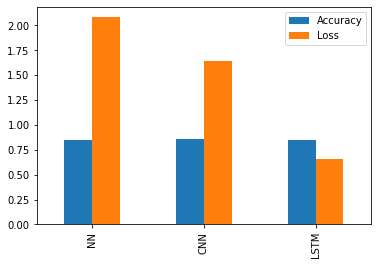

In [49]:
graph_df.plot(kind='bar')